In [63]:
from keras.layers import Input, Dense, Embedding, Flatten, dot, BatchNormalization
from keras.models import Model
from keras.utils import get_custom_objects
import keras.backend as K
from keras.callbacks import EarlyStopping,ModelCheckpoint


from IPython.display import display
import pandas as pd
import numpy as np
import os
from random import shuffle
from IPython.display import display
from sklearn.utils import shuffle
from sklearn import preprocessing
import matplotlib.pyplot as plt


# load data

In [18]:
# a=pd.DataFrame({'movie':[1,1,1,1,1],'user':[1,1,1,2,2],'rating':[1,2,-5,1,9]})
# display(a)
# a.groupby(['movie', 'user'])["rating"].sum().reset_index()


In [33]:
path=os.path.join('.','dataset','gossiping.pickle')
data=pd.read_pickle(path)
data.head(1)

,push_id,is_push,push_author,push_dt,train_or_test,content,label,article_id,push_num,title,href,article_author,article_dt
0,4,推,ebod221,2019-07-01 16:35:00.000000,train,北七,1,1561970056,42,[新聞] 臉書見「國中生外流」爽喊+1 人夫手機遭,www.ptt.cc/bbs/Gossiping/M.1561970056.A.18A.html,peterlin495,2019-07-01


In [42]:
# columns=['article_id','push_author','label']
# data2=data[columns].copy()
# data2['label']=data2['label'].apply(lambda x: -1 if x==0 else 1)
# data2=data2.sort_values(by=['article_id','push_author'])
# data2

def change_label(data):
    columns=['article_id','push_author','label','href']
    data2=data[columns].copy()
    data2['label']=data2['label'].apply(lambda x: -1 if x==0 else 1)
    data2=data2.sort_values(by=['article_id','push_author'])
    
    data2=data2.groupby(['article_id', 'push_author','href'])["label"].sum().reset_index()
    data2=data2.rename(columns={'label':'rating'})
    
    return data2

data2=change_label(data)
data2.head(5)

,article_id,push_author,href,rating
0,1397318347,ARASHIRLEY,www.ptt.cc/bbs/Gossiping/M.1397318347.A.88B.html,-1
1,1397318347,CasioMan,www.ptt.cc/bbs/Gossiping/M.1397318347.A.88B.html,0
2,1397318347,CharleneTsai,www.ptt.cc/bbs/Gossiping/M.1397318347.A.88B.html,2
3,1397318347,Cold5566,www.ptt.cc/bbs/Gossiping/M.1397318347.A.88B.html,1
4,1397318347,DALUGI,www.ptt.cc/bbs/Gossiping/M.1397318347.A.88B.html,1


In [44]:
data2.sort_values(by=['rating'],ascending=True)

,article_id,push_author,href,rating
172158,1550135122,mayjan,www.ptt.cc/bbs/Gossiping/M.1550135122.A.E01.html,-139
143120,1548694744,SilverFlare,www.ptt.cc/bbs/Gossiping/M.1548694744.A.66F.html,-135
96741,1546950140,mayjan,www.ptt.cc/bbs/Gossiping/M.1546950140.A.3D8.html,-128
465203,1558880918,tungpayton,www.ptt.cc/bbs/Gossiping/M.1558880918.A.197.html,-120
101411,1547038287,mayjan,www.ptt.cc/bbs/Gossiping/M.1547038287.A.C80.html,-117
180460,1550560760,mayjan,www.ptt.cc/bbs/Gossiping/M.1550560760.A.A2F.html,-113
258254,1553142101,mayjan,www.ptt.cc/bbs/Gossiping/M.1553142101.A.EE1.html,-109
255445,1553073797,mayjan,www.ptt.cc/bbs/Gossiping/M.1553073797.A.277.html,-102
138254,1548510171,mayjan,www.ptt.cc/bbs/Gossiping/M.1548510171.A.768.html,-101
496245,1559572224,tffc,www.ptt.cc/bbs/Gossiping/M.1559572224.A.080.html,-101


In [45]:
print(data2.shape)
print(data2.article_id.unique().shape)
print(data2.push_author.unique().shape)
print(data2.rating.min())
print(data2.rating.max())

(619639, 4)
(11596,)
(55974,)
-139
258


In [50]:
# users=pd.DataFrame({'push_author':data2.push_author.unique()})
# users['userID']=users.index

# articles=pd.DataFrame({'article_id':data2.article_id.unique()})
# articles['articleID']=articles.index

def get_users_articles(data2):
    users=pd.DataFrame({'push_author':data2.push_author.unique()})
    users['userID']=users.index

    articles=pd.DataFrame({'article_id':data2.article_id.unique()})
    articles['articleID']=articles.index

    return users,articles

users,articles=get_users_articles(data2)

display(users.head())
display(articles.head())

,push_author,userID
0,ARASHIRLEY,0
1,CasioMan,1
2,CharleneTsai,2
3,Cold5566,3
4,DALUGI,4


,article_id,articleID
0,1397318347,0
1,1410052986,1
2,1422703802,2
3,1435592523,3
4,1445086702,4


In [23]:
# a=np.array([1.0,2,3])
# print(preprocessing.scale(a))
# mean=np.mean(a)
# std=np.std(a)
# print((a-mean)/std)

In [76]:
# data3=pd.merge(left=data2,right=users, how='left', on='push_author')
# data3=pd.merge(left=data3,right=articles, how='left', on='article_id')
# data3=data3.sort_values(by=['userID'],ascending=True)
# data3=data3[['userID','articleID','rating']].reset_index(drop=True)
# data3

# a = np.array([-3,-2,-1,0,1,2,3])
# np.clip(a, -2, 2)

# bound=3
# rating_clip=np.clip(data_all['rating'].values, -bound, bound)  
# data_all['rating_clip']=rating_clip
# data_all['rating_shift']=data_all['rating_clip'].apply(lambda x: x+bound)
# data_all.rating_shift.min()

def get_data_all(data2,users,articles,bound=10):
    data3=pd.merge(left=data2,right=users, how='left', on='push_author')
    data3=pd.merge(left=data3,right=articles, how='left', on='article_id')
    data3=data3.sort_values(by=['userID'],ascending=True)
    data3=data3[['userID','articleID','rating']].reset_index(drop=True)
    
    rating_clip=np.clip(data3['rating'].values, -bound, bound)  
    data3['rating_clip']=rating_clip
    data3['rating_shift']=data3['rating_clip'].apply(lambda x: x+bound)
    return data3

bound=2
data_all=get_data_all(data2,users,articles,bound=bound)
print('rating min',data_all.rating.min())
print('rating max',data_all.rating.max())
print('rating_clip min',data_all.rating_clip.min())
print('rating_clip max',data_all.rating_clip.max())
print('rating_shift min',data_all.rating_shift.min())
print('rating_shift max',data_all.rating_shift.max())
data_all.tail()


rating min -139
rating max 258
rating_clip min -2
rating_clip max 2
rating_shift min 0
rating_shift max 4


,userID,articleID,rating,rating_clip,rating_shift
619634,55969,11593,1,1,3
619635,55970,11593,1,1,3
619636,55971,11593,1,1,3
619637,55972,11593,-1,-1,1
619638,55973,11593,1,1,3


In [77]:
# def normalize_rating(data_all):
#     arr=data_all.rating.values
#     rating_mean=np.mean(arr)
#     rating_std=np.std(arr)
#     rating_norm=(arr-rating_mean)/rating_std
#     data_all['rating_norm']=rating_norm
#     return data_all,rating_mean,rating_std

# data_norm,rating_mean,rating_std=normalize_rating(data_all)
# print(rating_mean,rating_std)
# data_norm.head()

In [78]:
# arr = np.arange(10)
# shuffle(arr)
# ratio=0.2
# valid_num=int(len(arr)*ratio)
# index_valid=arr[:valid_num]
# index_train=arr[valid_num:]
# print(index_valid,index_train)

def get_index_train_valid(n=10,ratio=0.2):
    arr = np.arange(n)
    shuffle(arr)
    valid_num=int(len(arr)*ratio)
    index_valid=arr[:valid_num]
    index_train=arr[valid_num:]
    return (index_valid,index_train)

index_valid,index_train=get_index_train_valid(n=10,ratio=0.3)
print(index_valid,index_train)

[0 1 2] [3 4 5 6 7 8 9]


In [79]:
# index_valid,index_train=get_index_train_valid(n=len(data_all),ratio=0.1)
# data_train=data_all.iloc[index_train].reset_index(drop=True)
# data_valid=data_all.iloc[index_valid].reset_index(drop=True)
# data_valid

def get_data_train_valid(data_all):
    index_valid,index_train=get_index_train_valid(n=len(data_all),ratio=0.1)
    data_train=data_all.iloc[index_train].reset_index(drop=True)
    data_valid=data_all.iloc[index_valid].reset_index(drop=True)
    return data_train,data_valid

data_train,data_valid=get_data_train_valid(data_all)
print(len(data_all),len(data_train),len(data_valid))
print(data_all.userID.unique().shape,data_all.articleID.unique().shape)
print(data_train.userID.unique().shape,data_train.articleID.unique().shape)
display(data_train.head())
display(data_valid.head())

619639 557676 61963
(55974,) (11596,)
(53442,) (11564,)


,userID,articleID,rating,rating_clip,rating_shift
0,2532,5617,1,1,3
1,2532,6963,36,2,4
2,2532,7945,1,1,3
3,2532,8362,9,2,4
4,2532,6754,1,1,3


,userID,articleID,rating,rating_clip,rating_shift
0,0,0,-1,-1,1
1,1,0,0,0,2
2,2,828,0,0,2
3,2,8566,-1,-1,1
4,2,6685,1,1,3


# model

In [80]:
def rmse(y_true, y_pred, bound=2):
    max_rating=bound*2
    y_pred = K.clip(y_pred, 0.0, max_rating)
    return K.sqrt(K.mean(K.pow(y_true - y_pred, 2)))

get_custom_objects().update({"rmse": rmse})


In [81]:
input_length=1
n_users=3
n_movies=8
latent_dim=20

user_input = Input(shape=(input_length,))
movie_input = Input(shape=(input_length,))

user_vecter = Embedding(input_dim=n_users, output_dim=latent_dim, input_length=input_length, embeddings_initializer="random_normal")(user_input)
user_vecter = Flatten()(user_vecter)

movie_vecter = Embedding(n_movies, latent_dim, embeddings_initializer="random_normal")(movie_input)
movie_vecter = Flatten()(movie_vecter)


rating_predict = dot([user_vecter,movie_vecter],axes=1)

model = Model([user_input,movie_input],rating_predict)

model.compile(loss="mse", optimizer="adam", metrics=[rmse])

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 20)        60          input_7[0][0]                    
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 20)        160         input_8[0][0]                    
__________________________________________________________________________________________________
flatten_7 

In [82]:
x_train=[data_train.userID.values,
         data_train.articleID.values]
y_train=[data_train.rating_shift.values]
print(y_train[0].max(),y_train[0].min())

x_valid=[data_valid.userID.values,
         data_valid.articleID.values]
y_valid=[data_valid.rating_shift.values]
print(y_valid[0].max(),y_valid[0].min())




4 0
4 0


In [83]:
# https://www.youtube.com/watch?v=BZh1ltr5Rkg
# https://stackoverflow.com/questions/47312219/what-does-non-trainable-params-mean
early_stopping = EarlyStopping(monitor='val_rmse', mode='min', verbose=1, patience=10, min_delta=0.001)
    
file_name = 'recommender'
file_name += '-'+"epoch_{epoch:02d}-val_rmse_{val_rmse:.3f}.hdf5"
path=os.path.join('.','dataset','weights',file_name)
checkpointer = ModelCheckpoint(filepath=path, verbose=1, monitor='val_rmse', save_best_only=True, mode='min', period=1)

epochs=100
batch_size=1000
history = model.fit(x_train,y_train,
                    validation_data=(x_valid,y_valid),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1, 
                    shuffle=True,
                    callbacks=[early_stopping,checkpointer]
                    )

Train on 557676 samples, validate on 61963 samples
Epoch 1/100
557676/557676 [==============================] - 2s 4us/step - loss: 7.7028 - rmse: 2.7753 - val_loss: 8.1607 - val_rmse: 2.8545

Epoch 00001: val_rmse improved from inf to 2.85448, saving model to ./dataset/weights/recommender-epoch_01-val_rmse_2.854.hdf5
Epoch 2/100
557676/557676 [==============================] - 2s 4us/step - loss: 7.7028 - rmse: 2.7753 - val_loss: 8.1607 - val_rmse: 2.8545

Epoch 00002: val_rmse did not improve from 2.85448
Epoch 3/100
557676/557676 [==============================] - 2s 4us/step - loss: 7.7028 - rmse: 2.7753 - val_loss: 8.1607 - val_rmse: 2.8545

Epoch 00003: val_rmse did not improve from 2.85448
Epoch 4/100
557676/557676 [==============================] - 2s 4us/step - loss: 7.7028 - rmse: 2.7753 - val_loss: 8.1607 - val_rmse: 2.8545

Epoch 00004: val_rmse did not improve from 2.85448
Epoch 5/100
557676/557676 [==============================] - 2s 4us/step - loss: 7.7028 - rmse: 2.775

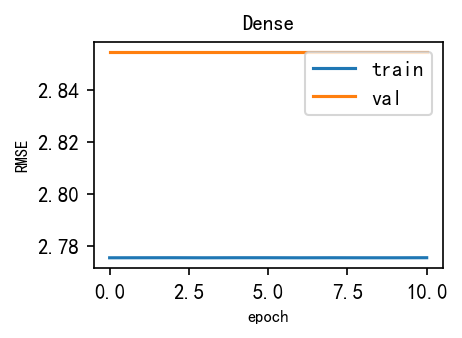

In [84]:
def plot_history(history):
    plt.figure(figsize=(3,2), dpi=150)
    plt.plot(history.history['rmse'])
    plt.plot(history.history['val_rmse'])
    plt.title('Dense', fontsize=10)
    plt.ylabel('RMSE', fontsize=8)
    plt.xlabel('epoch', fontsize=8)
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

plot_history(history)